In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [226]:
X = pd.read_csv("./Training Data Separating Chemicals/Logistic_X_Train.csv")
X_test = pd.read_csv("./Test Cases Separating chemicals/Logistic_X_Test.csv")
y = pd.read_csv("./Training Data Separating Chemicals/Logistic_Y_Train.csv")
X.shape, y.shape

((3000, 3), (3000, 1))

In [227]:
#normalization
y = np.array(y)
X = np.array(X)
X = (X - X.mean())/X.std()
X.shape

(3000, 3)

In [228]:
def hypothesis(x, theta, b):
    h = np.dot(x, theta) + b
    return sigmoid(h)

In [229]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0*z))

In [230]:
def error(x, y_true, theta, b):
    m = x.shape[0]
    e = 0.0
    for i in range(m):
        hx = hypothesis(x[i], theta, b)
        e += y_true[i]*np.log2(hx) + (1 - y_true[i])*np.log2(1 - hx)
    return -e/m

In [231]:
def gradient(x, theta, y_true, b):
    grad_theta = np.zeros(theta.shape)
    grad_b = 0.0
    m = x.shape[0]
    for i in range(m):
        hx = hypothesis(x[i], theta, b)
        grad_theta += (y_true[i] - hx)*x[i]
        grad_b += (y_true[i] - hx)
    grad_theta /= m
    grad_b /= m
    return [grad_theta, grad_b]

In [232]:
def gradientDescent(x, y_true, theta, b, learning_rate = 0.1):
    e = error(x, y_true, theta, b)
    [grad_theta, grad_b] = gradient(x, theta, y_true, b)
    theta = theta + learning_rate*grad_theta
    b = b + learning_rate*grad_b
    return e, theta, b

In [233]:
def predict(x, theta, b):
    confidence = hypothesis(x, theta, b)
    if (confidence < 0.5):
        return 0
    else:
        return 1

In [234]:
def accuracy(x_test, y_test, theta, b):
    y_pred = []
    for i in range(600):
        p = predict(x_test[i], theta, b)
        y_pred.append(p)
    y_pred = np.array(y_pred)
    y_test = np.array(y_test)
    return float((y_pred == y_test).sum())/600
    

In [235]:
loss = []
acc = []
theta = np.zeros((X.shape[1],))
b = 5*np.random.random()
theta.shape

(3,)

In [236]:
for i in range(100):
    l,theta,b = gradientDescent(X, y, theta, b, learning_rate = 20)
    loss.append(l)
    a = accuracy(X, y, theta, b)
    acc.append(a)

In [237]:
print(l)

[0.04710619]


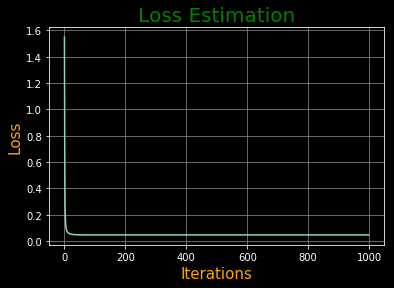

In [238]:
plt.style.use("dark_background")
plt.title("Loss Estimation", color = 'green', fontsize = 20)
plt.xlabel("Iterations", color = 'orange', fontsize = 15)
plt.ylabel("Loss", color = 'orange', fontsize = 15)
plt.plot(loss)
plt.grid(True, color = "grey")
plt.show()

In [241]:
acc[-1]

1500.06

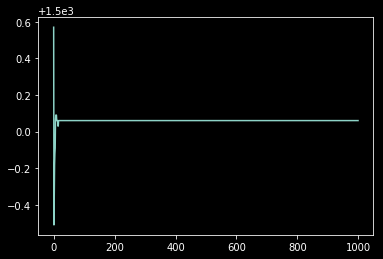

In [245]:
plt.plot(acc)
plt.show()

In [250]:
p = []
X_test = np.array(X_test)
for i in range(X_test.shape[0]):
    p.append(predict(X_test[i], theta, b))
df = pd.DataFrame({'label': list(p)})
df.to_csv('Submission_separating_chemicals.csv', index = False)